Import the neccessary libraries

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Data Loading

In [46]:
print("Loading Microsoft stock data...")
try:
    df = pd.read_csv('microsoft.csv')
    print("Data loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: The file 'microsoft.csv' was not found. Please ensure it is in the same directory.")
    exit()

Loading Microsoft stock data...
Data loaded successfully!

First 5 rows of the dataset:
         Date     Close      High       Low      Open      Volume
0  1986-03-13  0.059598  0.062259  0.054277  0.054277  1031788800
1  1986-03-14  0.061726  0.062791  0.059598  0.059598   308160000
2  1986-03-17  0.062791  0.063323  0.061726  0.061726   133171200
3  1986-03-18  0.061194  0.063323  0.060662  0.062791    67766400
4  1986-03-19  0.060130  0.061726  0.059598  0.061194    47894400


Data Preprocessing and Feature Engineering

In [47]:
# Data preprocesing involves cleaning and selecting the data to be used by the model
# We will define our features (X) and our target (y)
# The "Date" column is not a numerical feature, so we will not include it in our model

# Check for missing values
df_missing = df.isnull().sum()
print("Missing values")
print(df_missing)

# Check for duplicated values
df_duplicated = df.duplicated().sum()
print("Duplicated Values")
print(df_duplicated)
# Rename the column for clarity and consistency
df.rename(columns={
    "Date":"date",
    "Close":"close",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Volume":"volume"
},inplace=True)

# Define the features (X) and target (y)
features = ["open","high","low","volume"]
target = "close"

X = df[features]
y = df[target]

print("Shape of features (X):",X.shape)
print("Shape of target (y):",y.shape)

Missing values
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Duplicated Values
0
Shape of features (X): (9935, 4)
Shape of target (y): (9935,)


Data Splitting

In [48]:
# We split the data into a training set and a testing set
# The model learns from the training data and is then evaluated on the testing data
# which it has never seen before. This gives a realistic measure of its perfomance
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

print("Number of samples in training set",len(X_train))
print("Number of samples in testing set",len(X_test))

Number of samples in training set 7948
Number of samples in testing set 1987


Model Training

In [49]:
# We initialize our Linear Regression model and train it using the training data
# The "fit" method is where the magic happens, as the model learns the coefficients for its linear coefficient

print("Training the Linear Regression model........")
model = LinearRegression()
model.fit(X_train,y_train)
print("Model training complete")

Training the Linear Regression model........
Model training complete


Model Evaluation

In [50]:
# We use the trained model to make predictions on the test set
# We then evaluate these predictions using key metrics
# Mean Squared Errors (MSE) is the average of the squared errors and
# R-squared measures the proportion of variance in the dependent variable that is predictable from the independebt variables

print("Evaluating model")
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Evaluating model
Mean Squared Error (MSE): 0.44
R-squared: 1.00


Visualization

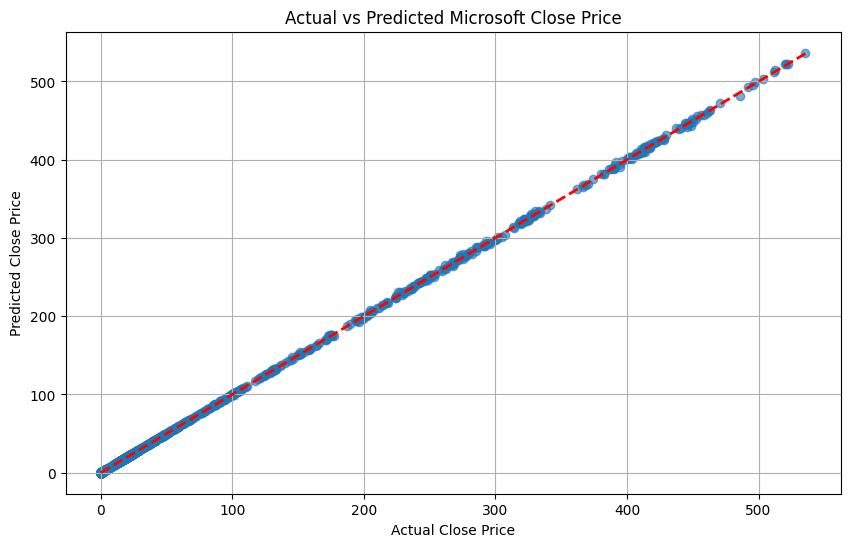

In [51]:
# A scatter plot is an excellent way to visualize the model's performance
# We plot the actual prices against the predicted prices. If the model is perfect,
# all points will fall on the dashed red line

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2)
plt.title("Actual vs Predicted Microsoft Close Price")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.grid(True)
plt.show()

Making a New Prediction

In [52]:
# Finally, we can use our trained model to make a prediction on new, unseen data
# This simulates how the model would be used in real life application
# Note: These values are hypothetical
new_data = pd.DataFrame({
    "open":[330.0],
    "high":[335.0],
    "low":[328.0],
    "volume":[15000000]
})

predicted_price = model.predict(new_data)
print(f"Example prediction for a new data point")
print(f"Features: open=330,high=335,low=328,volume=15M")
print(f"Predicted Close Price: ${predicted_price[0]:.2f}")

Example prediction for a new data point
Features: open=330,high=335,low=328,volume=15M
Predicted Close Price: $332.65
